# METAC DATA PREP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import math
import os
import glob

In [2]:
# check out seaborn & data frames



In [3]:
ids = ["9004", "9006", "9009", "9011", "9012"]
# 9012 has no aversiveness rating!!!
# data not yet transferred: 9010
# incomplete data sets: 9003, 9007, 9008

# path root
basedir = r"T:\METAC\behavior\raw\Temporary"

# init array
f = list()
d = []
dat = []

# loop over ppids
for idx, val in enumerate(ids):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + val
    taskfname = "behavior\\task\\*.csv"
    fullpath = os.path.join(basedir, ppid, taskfname)
    
    # load task data (experiment)
    for file in glob.glob(fullpath):
        if file.find("experiment") != -1:
    
            # aversiveness rating
            try:
                aversiveness = pd.read_csv(file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan
    
            print(av)
    
            # task settings
            specifications = pd.read_csv(file, nrows=1)
            specifications.insert(0, "id", idx) # add sub idx
            specifications.insert(15, "aversiveness", av) # add aversiveness rating
    
            # repeat rows
            specs80 = pd.DataFrame(np.repeat(specifications.values, specifications.values[0,1], axis=0))
            specs80.columns = specifications.columns
            print(specs80.shape)
            
            tmp_specs = specifications.to_numpy()
            tmp_specs = np.repeat(tmp_specs, repeats = specifications.values[0,1], axis=0)
    
            # responses
            data = pd.read_csv(file, skiprows=[0,1,83,84])
            print(data.shape)
    
            # concatenate arrays
            # dat = np.concatenate([data, tmp_specs], axis=1)
            dat = pd.concat([data, specs80], axis=1)
            print(dat.shape)
            
            # d.update({str(idx): dat})
            f.append(dat)

# stack arrays
# d = np.vstack(f)
# print(d.shape)
# d[93,:]
df = pd.concat(f, ignore_index=True)
print(df.shape)
df

[[0.7]]
(80, 16)
(80, 11)
(80, 27)
[[0.7]]
(80, 16)
(80, 11)
(80, 27)
[[0.8]]
(80, 16)
(80, 11)
(80, 27)
[[0.364614]]
(80, 16)
(80, 11)
(80, 27)
nan
(80, 16)
(80, 11)
(80, 27)
(400, 27)


,trial#,iWidth,iDistance,wind,jAngle,jStrengthFactor,jSuccess,prediction,control,tStart,...,angleLimit,distanceMin,distanceMax,widthS,widthL,jumpStrength,windStrength,sceneWidth,sceneHeight,aversiveness
0,1,0.17,0.58,0.0,45,0.750000,1,0.275000,0.750000,24/04/24 15:54:41,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
1,2,0.17,0.41,0.0,45,0.450000,1,0.250000,0.850000,24/04/24 15:55:17,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
2,3,0.17,0.39,0.0,45,0.300000,0,0.725000,0.500000,24/04/24 15:55:48,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
3,4,0.17,0.52,0.0,45,0.700000,0,0.300000,0.600000,24/04/24 15:56:29,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
4,5,0.17,0.59,0.0,45,0.750000,1,0.325000,0.850000,24/04/24 15:57:03,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,76,0.07,0.54,0.0,45,0.738025,0,0.876833,0.046921,24/06/04 16:39:46,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,NaN
396,77,0.07,0.52,0.0,45,0.593353,1,0.221896,0.979472,24/06/04 16:40:19,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,NaN
397,78,0.17,0.36,-0.1,45,0.524927,1,0.684262,0.982405,24/06/04 16:40:49,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,NaN
398,79,0.17,0.36,0.1,45,0.509286,0,0.287390,0.230694,24/06/04 16:41:19,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,NaN


In [17]:
# Apply the default theme
sns.set_theme()

tips = sns.load_dataset("tips")
tips
df.columns

Index(['trial#', ' iWidth', ' iDistance', ' wind', ' jAngle',
       ' jStrengthFactor', ' jSuccess', ' prediction', ' control', ' tStart',
       ' b1Duration', 'id', 'trialNo', ' jumpOnly', ' sequence', ' lang',
       ' mode', ' angleLimit', ' distanceMin', ' distanceMax', ' widthS',
       ' widthL', ' jumpStrength', ' windStrength', ' sceneWidth',
       ' sceneHeight', 'aversiveness'],
      dtype='object')

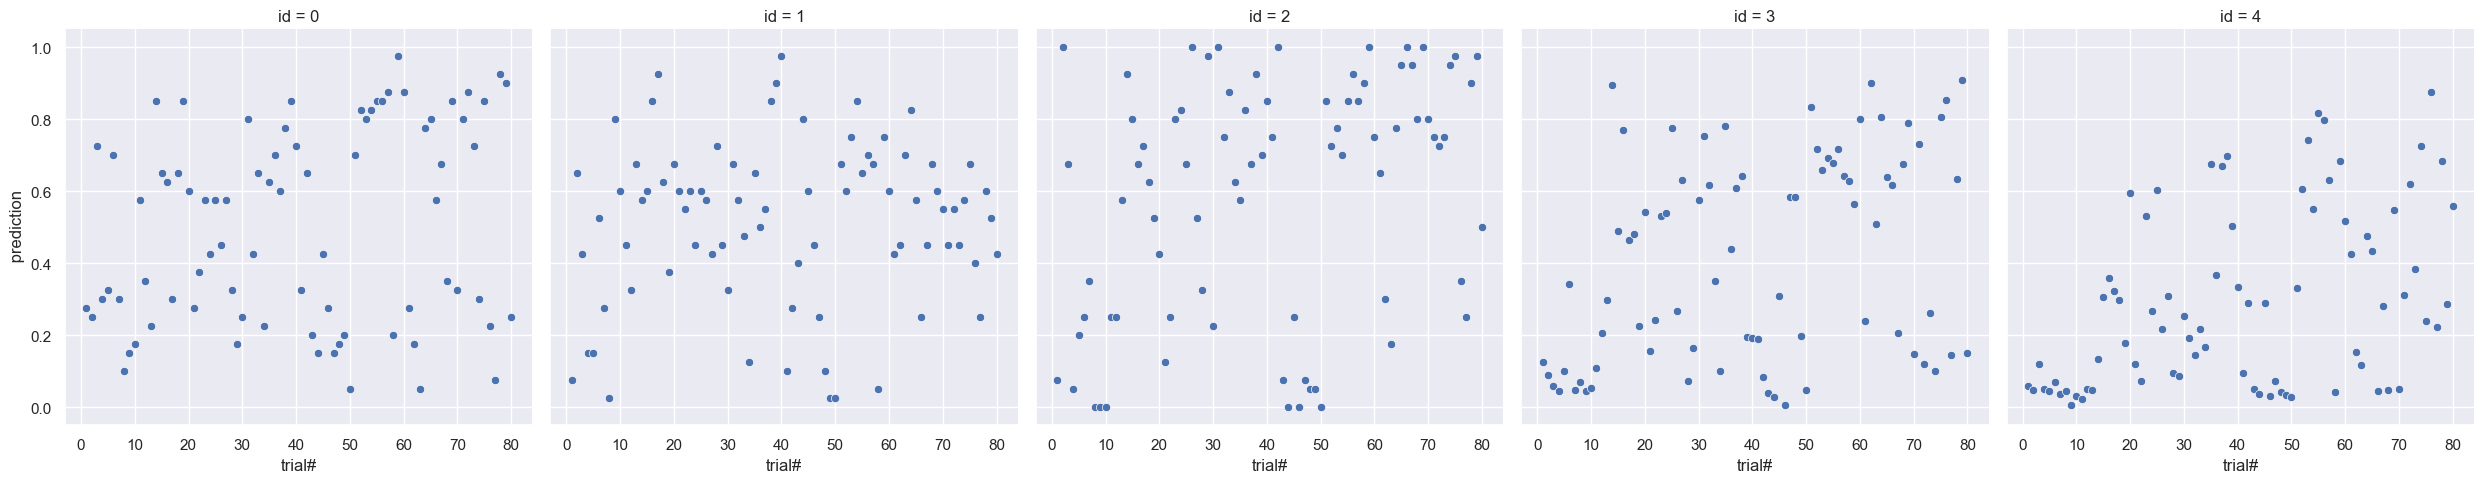

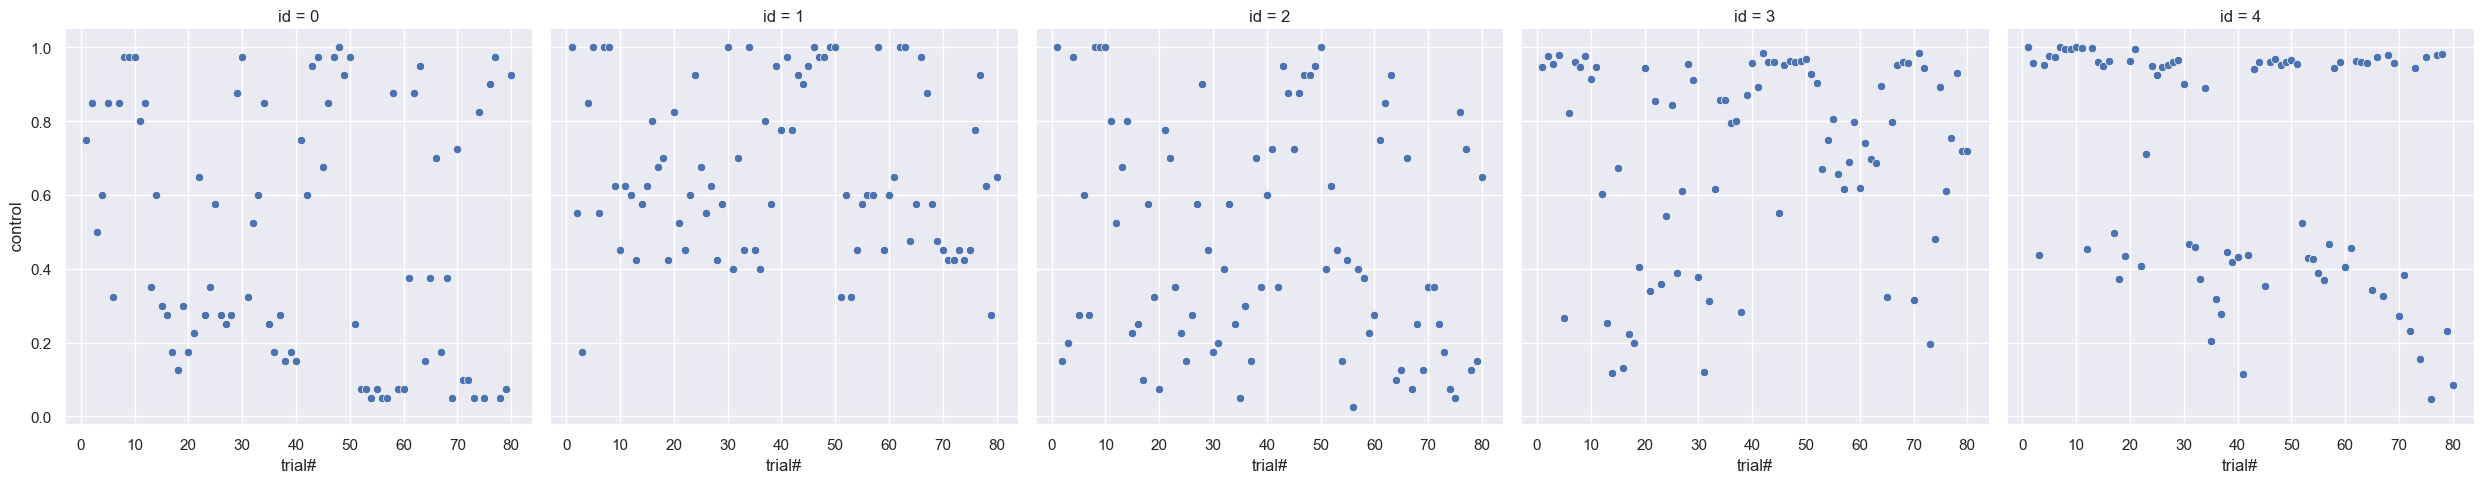

In [24]:
# Create a visualization
sns.relplot(
    data=df,
    x="trial#", y=" prediction", col="id",
)

sns.relplot(
    data=df,
    x="trial#", y=" control", col="id",
)

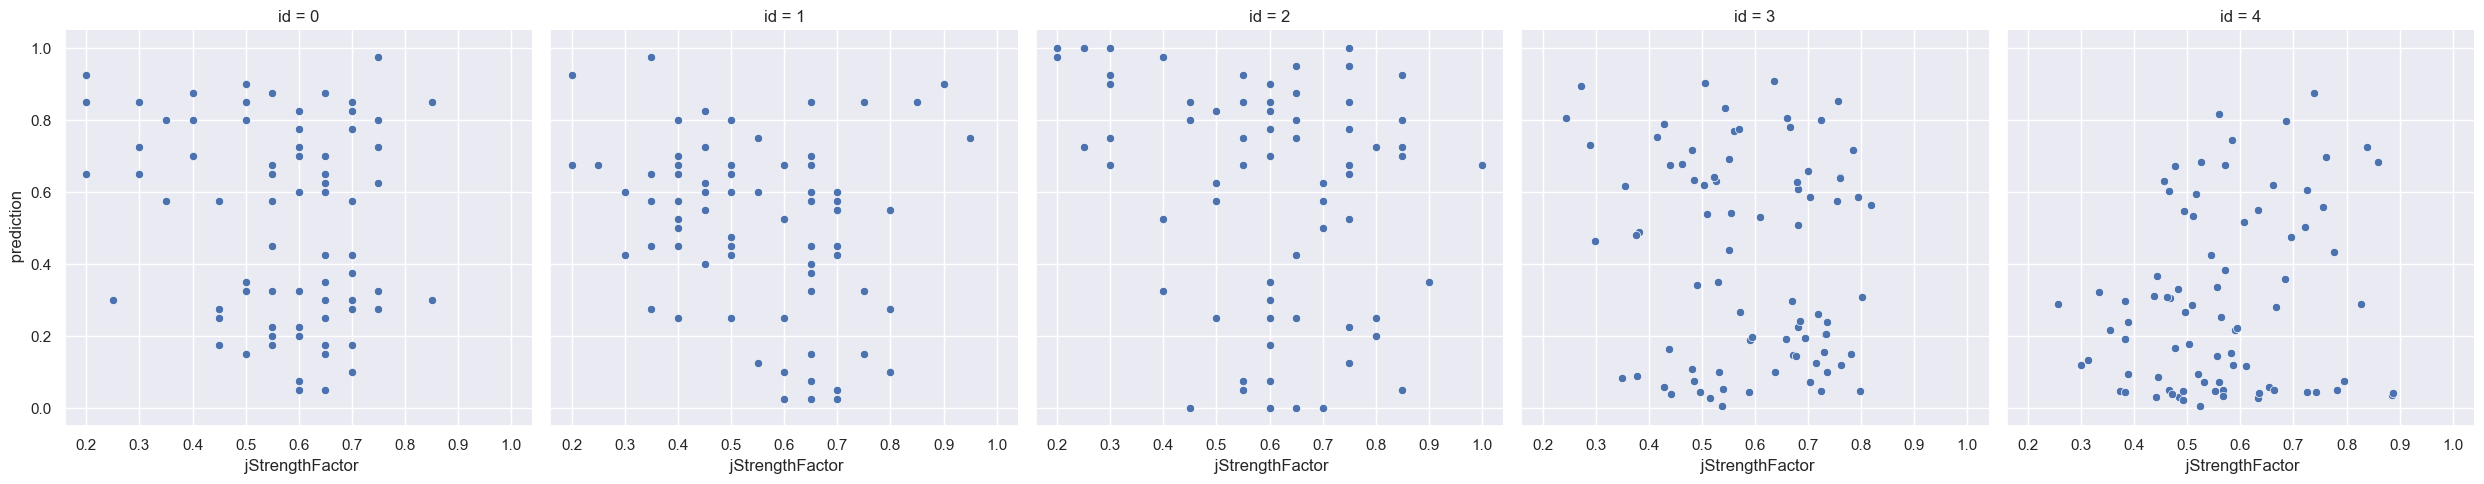

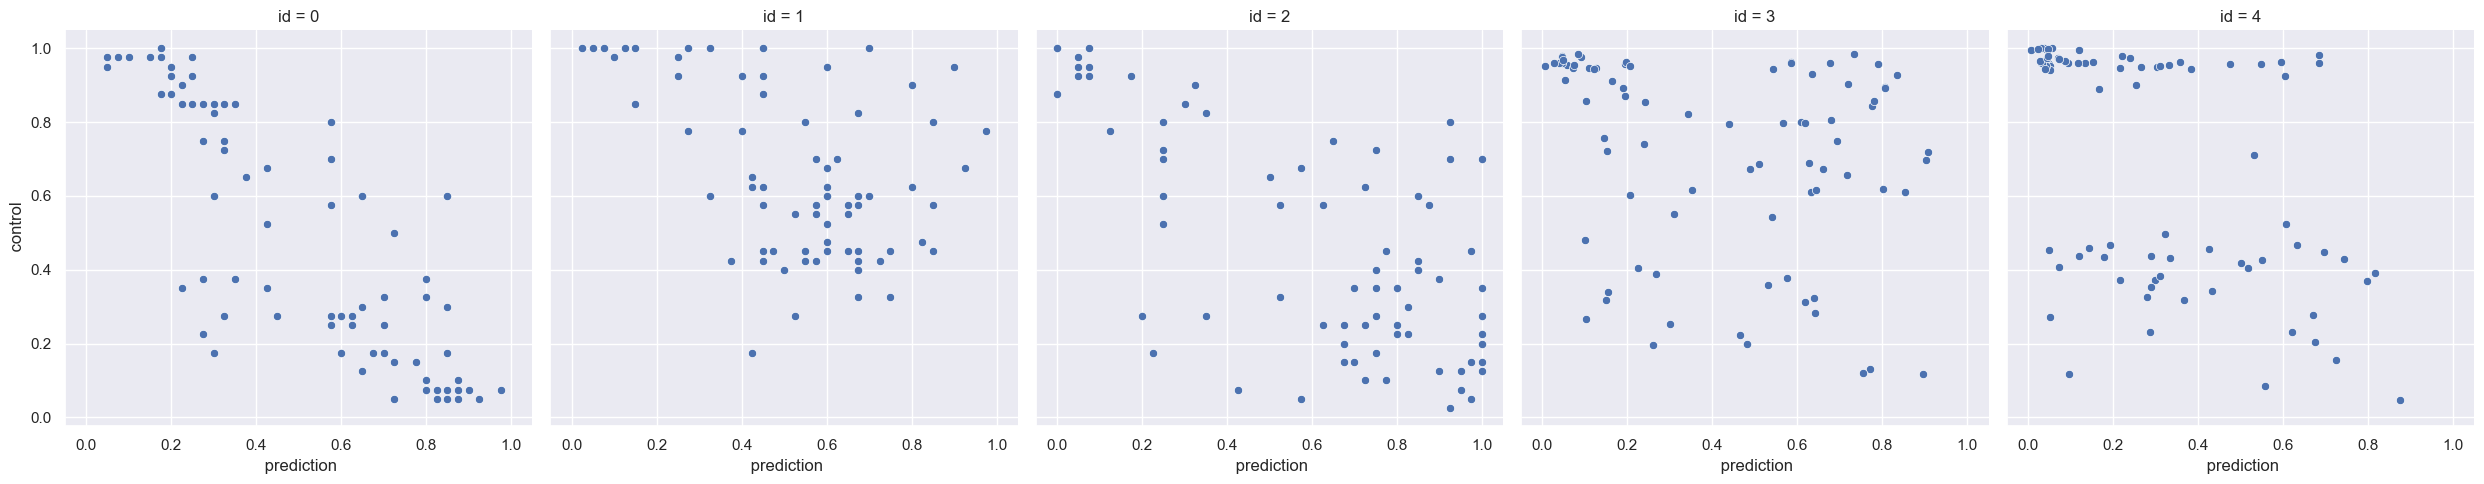

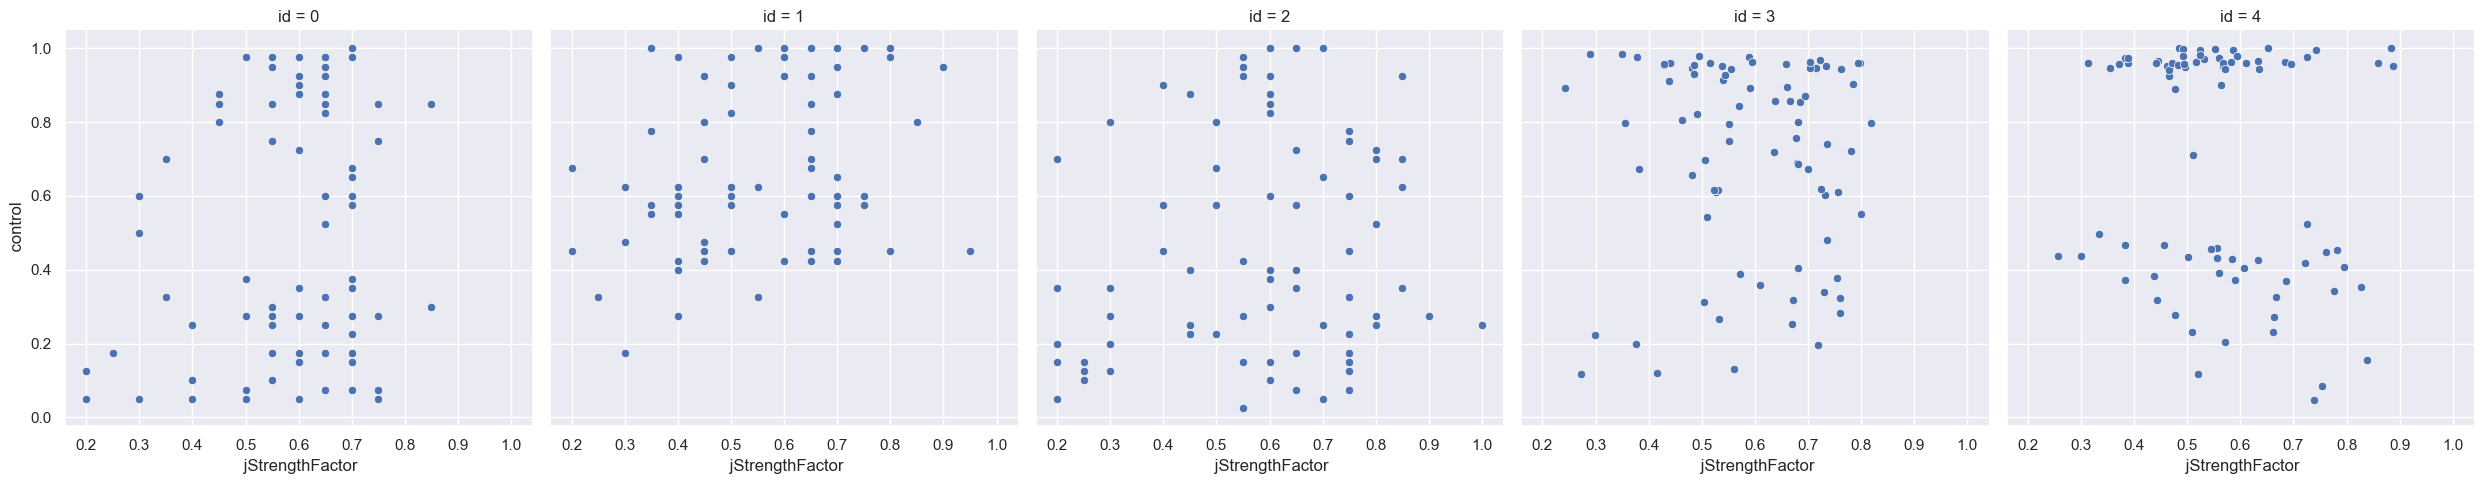

In [23]:
# Create a visualization of subsequent responses
sns.relplot(
    data=df,
    x=" jStrengthFactor", y=" prediction", col="id",
)

sns.relplot(
    data=df,
    x=" prediction", y=" control", col="id",
)

sns.relplot(
    data=df,
    x=" jStrengthFactor", y=" control", col="id",
)


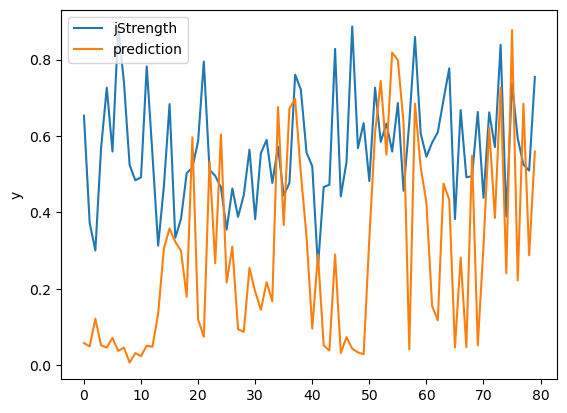

In [400]:
# sub (column idx 1)
idx = 4
plt.plot(d[:,5][d[:,11]==idx])
plt.plot(d[:,7][d[:,11]==idx])
plt.ylabel('y')
plt.legend(['jStrength', 'prediction'])
plt.show()

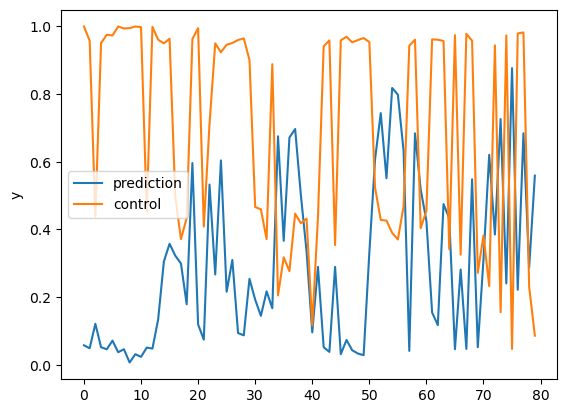

In [401]:
plt.plot(d[:,7][d[:,11]==idx])
plt.plot(d[:,8][d[:,11]==idx])
plt.ylabel('y')
plt.legend(['prediction', 'control'])
plt.show()

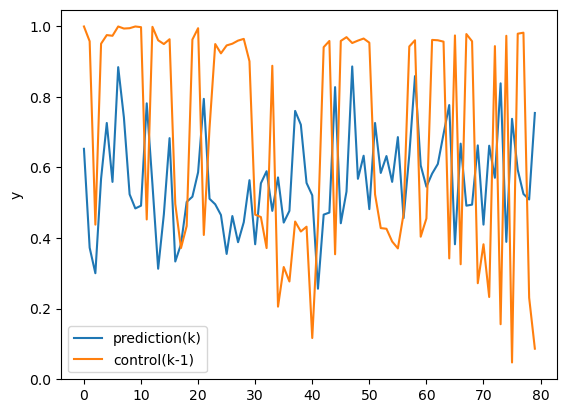

In [402]:
plt.plot(d[:,5][d[:,11]==idx])
plt.plot(d[:,8][d[:,11]==idx])
plt.ylabel('y')
plt.legend(['prediction(k)', 'control(k-1)'])
plt.show()